# Wahlfach: Data Science
#### Student: Arian Moser
#### Matrikelnummer: 2308965
#### Kurs: TINF16B
#### Abgabe: 18.04.2019


# Nummer 1: Analyse, Interpretation und Bereinigung der Daten


## Aufgabe
- Fahrzeugdatensatz ist mit Hilfe statistischer Standardfunktionen zu analysieren, interpretieren und ggfs. bereinigen
- Visuelle Darstellungsarten in verschiedenen Diagrammen, um wichtige Zusammenhänge zu visualisieren
- Kommentare, um interessante Erkenntnisse festzuhalten

## Erste Notizen 

### Crisp-DM

#### Phase: Data Unterstanding
- Welche Daten liegen vor?
  - Fahrzeugdaten, in dem verschiedene Merkmale von Fahrzeugen genannt werden
  - Format CSV-Datei
  - Anzahl der Dimensionen: 9 (inkl. der Klassenatttribute)
  - Anzahl der Datenpunkte: 406 
  - Attribute:
    1. **mpg**:           continuous
    2. **cylinders**:     multi-valued discrete
    3. **displacement**:  continuous
    4. **horsepower**:    continuous
    5. **weight**:        continuous
    6. **acceleration**:  continuous
    7. **model year**:    multi-valued discrete
    8. **origin**:        multi-valued discrete
    9. **car name**:      string (unique for each instance)
  - Zusatz:
    - horsepower fehlen 6 Attributwerte
    - mpg fehlen 8 Attributwerte

- Wie sehen diese Daten aus? Könnte es Probleme mit den Daten geben?
  - im csv format
  - fehlende Attribute bei mpg und horsepower (NA) 
    - könnten zu Probleme führen
    - unvollständige Datensätze sollten entfernt werden
  - Attribute getrennt durch verschieden viele Leerzeichen
  - Zeile = Datensatz
- Kann man "auf den ersten Blick" Zusammenhänge erkennen?
  - Gewicht und MPG korreliert negativ
  - PS und Hubraum korellieren negativ
  - Hubraum und Gewicht korrelieren positiv
- Wie können beispielhafte Antworten oder Ergebnisse aussehen? 

#### Phase: Data Preparation
- Können die Daten in der vorliegenden Form verwendet werden?
  - ja könnten sie
  - könnten aber zu verfälschenden Ergebnissen führen
- Wie können diese vorverarbeitet werden, um sie zu verwenden?
  - Unvollständige Datensätze entfernen

### Attribute-Übersetzung

- **MPG**: A car’s mpg figure will tell you approximately how far it’ll travel using a single UK gallon (4.55 litres) of fuel.
- **Cylinders**: Zylinder
- **Displacement**: Hubraum
- **Horsepower**: PS
- **Weight**: Gewicht
- **Acceleration**: Beschleunigung
- **Model Year**: Modelljahr
- **Origin**: Generation?
- **Car Name**: Autobezeichung


### Imports

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Vorbereitung der CSV Datei
Hier werden die zur Verfügung gestellte Datei so bearbeitet, dass sie im nachfolgenden Schritt leichter als CSV Datei eingelesen werden kann. Dafür werden die Abstände zwischen den einzelnen Attributen auf ein Leerzeichen gekürzt. Die Datei wird anschließend als _autodata.csv_ im Ordner _data_ gespeichert.

In [2]:
pd.set_option('display.max_columns', None)
# Manipulate data
f = open("../data/auto-mpg.data-original")
content = f.read()
f.close()
while content != content.replace('  ', ' '):
    content = content.replace('  ', ' ')
content = content.replace('\t', ' ')
# print(content)

f = open("../data/autodata.csv", "w")
f.write(content)
f.close()

### Einlesen der CSV Datei

In [3]:
# readin data 
col_labels=('mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name')
pd.options.display.float_format = '{:,.2f}'.format
df = pd.read_csv("../data/autodata.csv", delimiter=" ", header=None, names=col_labels)

### Analyse der Daten

In [4]:
print("Dimensionen: ", end='')
print(df.shape)


Dimensionen: (406, 9)


##### Ergebnis
406 Dimensionen á 9 Datenpunkte

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null float64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null float64
acceleration    406 non-null float64
model year      406 non-null float64
origin          406 non-null float64
car name        406 non-null object
dtypes: float64(8), object(1)
memory usage: 28.6+ KB


### Auszug der ersten 15 Datensätze

In [6]:
# show top 15 of table
df.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.00,8.00,307.00,130.00,"3,504.00",12.00,70.00,1.00,chevrolet chevelle malibu
1,15.00,8.00,350.00,165.00,"3,693.00",11.50,70.00,1.00,buick skylark 320
2,18.00,8.00,318.00,150.00,"3,436.00",11.00,70.00,1.00,plymouth satellite
3,16.00,8.00,304.00,150.00,"3,433.00",12.00,70.00,1.00,amc rebel sst
4,17.00,8.00,302.00,140.00,"3,449.00",10.50,70.00,1.00,ford torino
5,15.00,8.00,429.00,198.00,"4,341.00",10.00,70.00,1.00,ford galaxie 500
6,14.00,8.00,454.00,220.00,"4,354.00",9.00,70.00,1.00,chevrolet impala
7,14.00,8.00,440.00,215.00,"4,312.00",8.50,70.00,1.00,plymouth fury iii
8,14.00,8.00,455.00,225.00,"4,425.00",10.00,70.00,1.00,pontiac catalina
9,15.00,8.00,390.00,190.00,"3,850.00",8.50,70.00,1.00,amc ambassador dpl


Wie man in den Datensätzen 10 bis 14 sehen kann, sind die Datensätze nicht alle vollständig. Deswegen würde es sich im nächsten Schritt anbieten, die Daten von unvollständigen Datensätzen zu bereinigen.

### Statistische Tabelle ohne Bereinigung

In [7]:
# Describe the data
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,406.00,406.00,400.00,406.00,406.00,406.00,406.00
mean,23.51,5.48,194.78,105.08,"2,979.41",15.52,75.92,1.57
std,7.82,1.71,104.92,38.77,847.00,2.80,3.75,0.80
min,9.00,3.00,68.00,46.00,"1,613.00",8.00,70.00,1.00
25%,17.50,4.00,105.00,75.75,"2,226.50",13.70,73.00,1.00
50%,23.00,4.00,151.00,95.00,"2,822.50",15.50,76.00,1.00
75%,29.00,8.00,302.00,130.00,"3,618.25",17.17,79.00,2.00
max,46.60,8.00,455.00,230.00,"5,140.00",24.80,82.00,3.00


### Statistische Tabelle mit Bereinigung

In [8]:
df_with_correction = df[df['mpg'].notnull()]
df_with_correction = df_with_correction[df_with_correction['horsepower'].notnull()]
print('Dimensions after corretion: ', end='')
print(df_with_correction.shape)
df_with_correction.describe()

Dimensions after corretion: (392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,"2,977.58",15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,"1,613.00",8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,"2,225.25",13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,"2,803.50",15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,"3,614.75",17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,"5,140.00",24.80,82.00,3.00


Nach der Bereinigung wurden 14 Datensätze entfernt. Dies führte dazu, dass sich die statistischen Kennwerte teilweise noch verändert haben (Vergleiche obrigen Tabellen). 

### Verteilung einzelner Attribute

Cylinders
4.00    199
8.00    103
6.00     83
3.00      4
5.00      3
Name: cylinders, dtype: int64


/home/mosera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


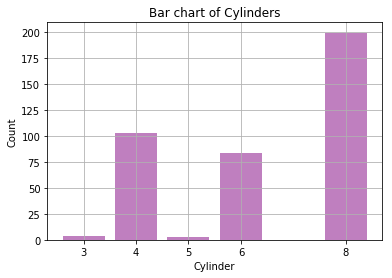

In [9]:
print('Cylinders')
#print(df_with_correction['cylinders'].unique())
cylinder_count_array = df_with_correction['cylinders'].value_counts().as_matrix()
cylinder_label_array = df_with_correction['cylinders'].unique() 
print(df_with_correction['cylinders'].value_counts())

index = np.arange(len(cylinder_label_array))
bar_width = 0.35

plt.bar(cylinder_label_array, cylinder_count_array, align='center', alpha=0.5, facecolor='purple')
plt.xticks(cylinder_label_array)
plt.xlabel('Cylinder')
plt.ylabel('Count')
plt.title('Bar chart of Cylinders')
plt.grid(True)
plt.show()

Hier fällt auf, dass kaum Datensätze mit einer Zylinderzahl von 3 oder 5 gegeben sind. Dies könnte später bei der Klassifikation der Zylinder in Aufgabe 3 zu Problemen führen.

Origin
1.00    245
3.00     79
2.00     68
Name: origin, dtype: int64


/home/mosera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


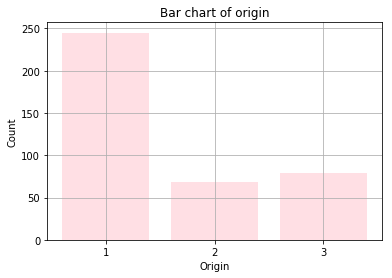

In [10]:
print('Origin')
#print(df_with_correction['cylinders'].unique())
cylinder_count_array = df_with_correction['origin'].value_counts().as_matrix()
cylinder_label_array = df_with_correction['origin'].unique() 
print(df_with_correction['origin'].value_counts())

index = np.arange(len(cylinder_label_array))
bar_width = 0.35

plt.bar(cylinder_label_array, cylinder_count_array, align='center', alpha=0.5, facecolor='pink')
plt.xticks(cylinder_label_array)
plt.xlabel('Origin')
plt.ylabel('Count')
plt.title('Bar chart of origin')
plt.grid(True)
plt.show()

Model year
73.00    40
78.00    36
76.00    34
82.00    30
75.00    30
79.00    29
70.00    29
81.00    28
77.00    28
72.00    28
80.00    27
71.00    27
74.00    26
Name: model year, dtype: int64


/home/mosera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


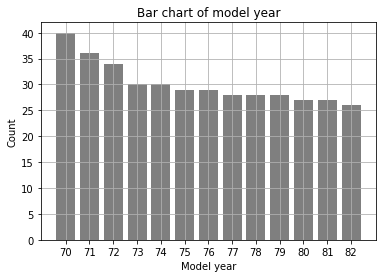

In [11]:
print('Model year')
#print(df_with_correction['cylinders'].unique())
cylinder_count_array = df_with_correction['model year'].value_counts().as_matrix()
cylinder_label_array = df_with_correction['model year'].unique() 
print(df_with_correction['model year'].value_counts())

index = np.arange(len(cylinder_label_array))
bar_width = 0.35

plt.bar(cylinder_label_array, cylinder_count_array, align='center', alpha=0.5, facecolor='black')
plt.xticks(cylinder_label_array)
plt.xlabel('Model year')
plt.ylabel('Count')
plt.title('Bar chart of model year')
plt.grid(True)
plt.show()

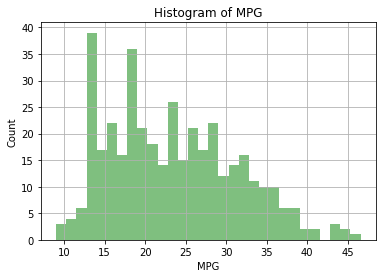

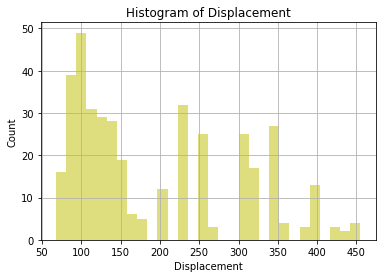

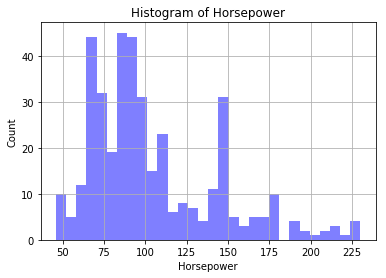

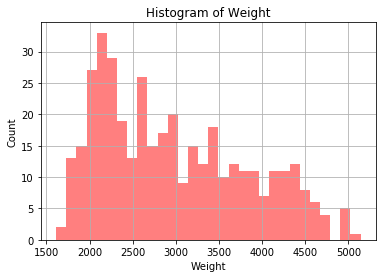

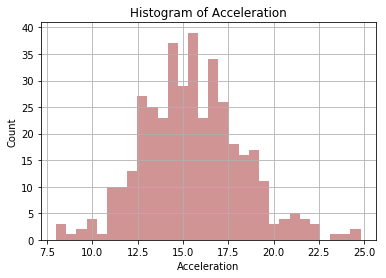

In [12]:
# MPG
plt.hist(df_with_correction['mpg'], 30, alpha=0.5, facecolor='g')
plt.xlabel('MPG')
plt.ylabel('Count')
plt.title('Histogram of MPG')
plt.grid(True)
plt.show()

# Displacement
plt.hist(df_with_correction['displacement'], 30, alpha=0.5, facecolor='y')
plt.xlabel('Displacement')
plt.ylabel('Count')
plt.title('Histogram of Displacement')
plt.grid(True)
plt.show()

# Horsepower
plt.hist(df_with_correction['horsepower'], 30, alpha=0.5, facecolor='b')
plt.xlabel('Horsepower')
plt.ylabel('Count')
plt.title('Histogram of Horsepower')
plt.grid(True)
plt.show()

# Weight
plt.hist(df_with_correction['weight'], 30, alpha=0.5, facecolor='r')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Histogram of Weight')
plt.grid(True)
plt.show()

# Acceleration
plt.hist(df_with_correction['acceleration'], 30, alpha=0.5, facecolor='brown')
plt.xlabel('Acceleration')
plt.ylabel('Count')
plt.title('Histogram of Acceleration')
plt.grid(True)
plt.show()

### Visualisierung

Da Zylinder, Generationen und Modelljahr diskrete Variablen sind, bietet es sich an, einen dieser Attribute inform von farblicher Hinterlegung in die paarweisen Diagramme mit einzubinden. Nachfolgend wurde sich für die Zylinderzahl entschieden. 

#### Paarweises Plotten 

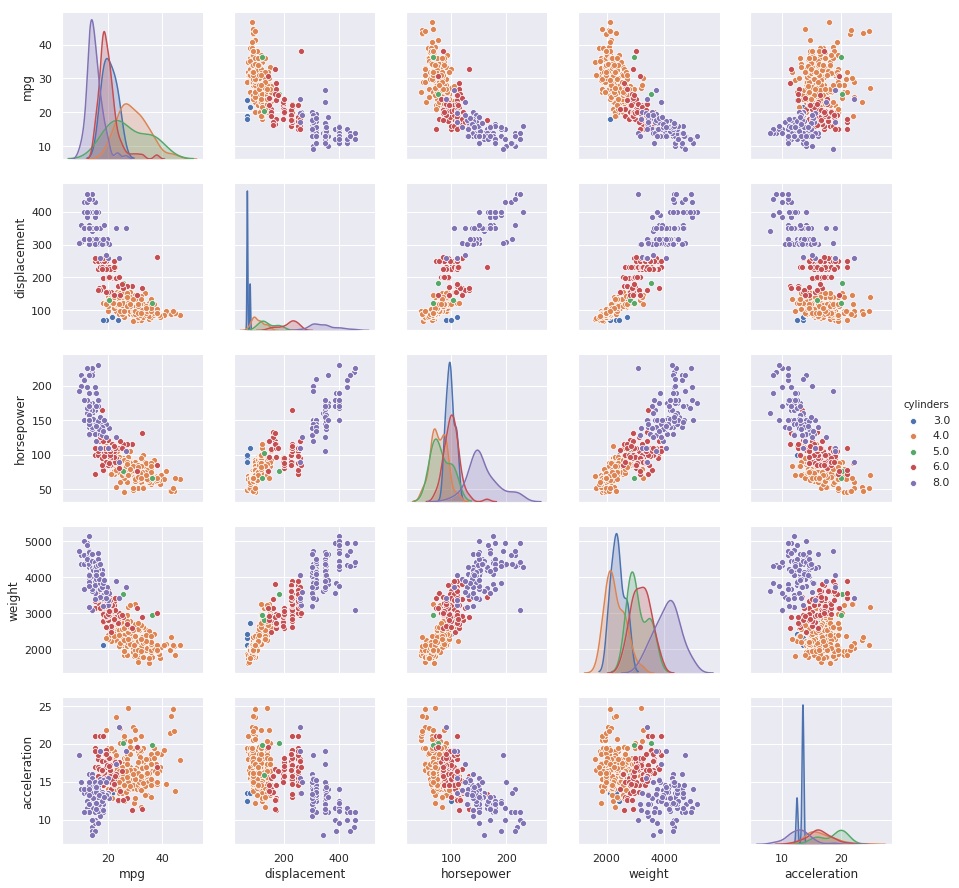

In [13]:
# This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:
cols=('mpg', 'displacement', 'horsepower', 'weight', 'acceleration')
sns.set(color_codes=True)
sns.pairplot(df_with_correction, hue='cylinders', vars=cols)

#### Hervorhebung einzelner Diagramme

MPG


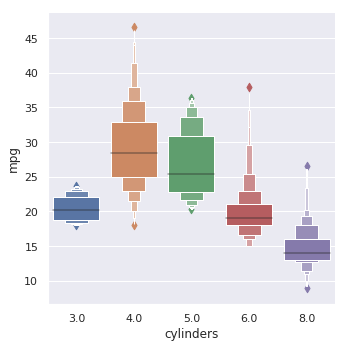

In [14]:
print('MPG')
sns.catplot(x="cylinders", y="mpg", data=df_with_correction, kind="boxen")


Das erste Diagramm lässt vermuten, dass je niedriger die Zylinderzahl eines Autos ist desto höher ist die MPG (niedriger ist der Benzinverbrauch) (negative Korrelation). Allerdings fallen die Werte der 3-Zylinder-Fahrzeuge ein bisschen aus dieser Vermutung heraus. 

In [15]:
np.corrcoef(df_with_correction['cylinders'], df_with_correction['mpg'] )


array([[ 1.        , -0.77761751],
       [-0.77761751,  1.        ]])

Die Korrelation der beiden liegt bei -0.77, was für die vorherige Vermutung nochmal unterstreicht.

### Korrelation einzelner Attribute
#### Gewicht und MPG


In [16]:
x = df_with_correction['weight']
y = df_with_correction['mpg'] 
np.corrcoef(x, y)

array([[ 1.        , -0.83224421],
       [-0.83224421,  1.        ]])

Die Korrelation zwischen Gewicht und MPG liegt bei -0.83, was bedeutet, dass eine sehr hohe negative Korrelation zwischen diesen Attributen vorliegt. Das heißt, dass je höher das Gewicht eines Fahrzeuges ist, desto höher ist der Spritverbrauch bzw. so geringer ist die MPG.

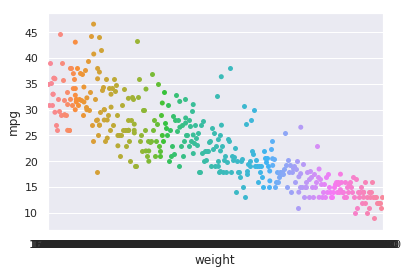

In [17]:
sns.stripplot(x="weight", y="mpg", data=df_with_correction, jitter=True)

#### Beschleunigung und Hubraum

In [18]:
x = df_with_correction['acceleration']
y = df_with_correction['displacement'] 
np.corrcoef(x, y)

array([[ 1.       , -0.5438005],
       [-0.5438005,  1.       ]])

Zwischen PS und MPG gibt es eine mäßig bis hohe negative Korrelation.

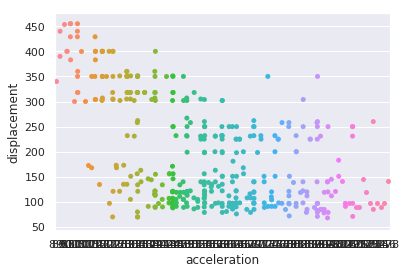

In [19]:
sns.stripplot(x="acceleration", y="displacement", data=df_with_correction, jitter=True)

#### Hubraum und Gewicht

In [20]:
x = df_with_correction['displacement']
y = df_with_correction['weight'] 
np.corrcoef(x, y)

array([[1.       , 0.9329944],
       [0.9329944, 1.       ]])

Zwischen Hubraum und Gewicht gibt es eine hohe positive Korrelaton.

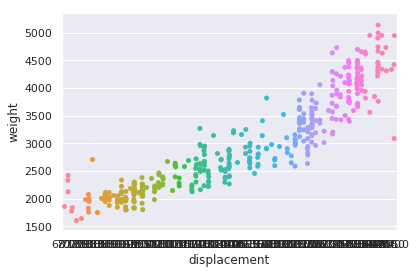

In [21]:
sns.stripplot(x="displacement", y="weight", data=df_with_correction, jitter=True)

# Nummer 2: Vorhersage der PS-Zahl

## Aufgabe
- Zwei verschiedene Vorhersageverfahren
- PS-Zahl eines gegebenen Datensatzes ohne PS-Zahl vorherzusagen

### Weiterhin zu beantworten
- Validieren und testen der Ergebnisse mit Evaluationsmethoden
- Ergebnis der Verfahren vergleichbar optisch darstellen
- Beschreibung des Endergebnisses
- Diskussion, welche Lösung sich entschieden wird
- Optimierung einer bis maximal drei Interationen
- Kommentar, welche weitern Möglichkeiten es gibt
- Methode
  - Manuelle Eingabe Werte
  - Vorhersage treffen 
  - Optische Darstellung

### Weitere Importe

In [22]:
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from numpy.polynomial.polynomial import polyfit
from sklearn.tree import DecisionTreeRegressor
#from sklearn import preprocessing
from sklearn.model_selection import KFold

### Funktionen

In [23]:
# function for horsepower prediction
# ([],model)->([])
def predict_horsepower(given_values, model):
    prediction = model.predict(given_values)
    print("Given=%s, Predicted Horsepower: %s" % (given_values, prediction[0]))
    return prediction

def plot_overview_diagram(title, label, data):
    x_train = data['x_train']
    y_train = data['y_train']
    x_test = data['x_test']
    y_test = data['y_test']
    y_predict = data['y_predict']
    fig, ax = plt.subplots()
    x_label_name = label['x']
    y_label_name = label['y']

    # Descriptions
    plt.title(title)
    plt.xlabel(x_label_name.capitalize())
    plt.ylabel(y_label_name.capitalize())
    
    # Graphs
    ax.scatter(x_train[x_label_name], y_train, color='yellow', label='train')
    ax.scatter(x_test[x_label_name], y_test, color='blue', label='test')
    ax.scatter(x_test[x_label_name], y_predict, color='red', label='predict')

    # Polynomial curve fitting (linear)
    b, m = polyfit(x_train[x_label_name], y_train, 1)
    # Linear function
    plt.plot(x_test[x_label_name], m * np.array(x_test[x_label_name]) + b, '--', color='green')

    
    legend = ax.legend(loc='upper left', shadow=True)

    # Put a nicer background color on the legend.
    legend.get_frame().set_facecolor('C0')

    plt.show()
    
def print_scores(model, data):
    # Accuracy
    accuracy = get_accuracy(model, data)
    print('Accuracy: ', accuracy)
    # Mean squared error
    mse = get_mse(data['y_test'], data['y_predict'])
    print('Mean squared error: ', mse)
    
def get_accuracy(model, data):
    return model.score(data['x_test'], data['y_test'])

def get_mse(y_test, y_predict):
    return metrics.mean_squared_error(y_test, y_predict)

# formatfloat list to max 2 decimal format for a prettier output
def format_float_list(float_list):
    formatted_list = []
    for el in float_list:
        formatted_list.append('%.2f'%el)
    return formatted_list

##### Split dataframe into data and target valumes
Data: ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']   
Target: ['horsepower']

In [24]:
# split dataframe into  data and target
x_t2 = pd.DataFrame(df_with_correction, columns=\
                    ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin'])
y_t2 = df_with_correction['horsepower']
labels_t2 = {'x':'displacement', 'y': 'horsepower'}

### Create random dataset

In [25]:
# create random training and testing vars
data_random = dict()
data_random['x_train'], data_random['x_test'], data_random['y_train'], data_random['y_test'] = \
            train_test_split(x_t2, y_t2, test_size=0.2)

##### Train linear regression model with the random data

First 10 predictions for the random test data:
[190.05303572  98.96518965  81.47803843  86.11931811 140.00484328
 104.37907385  77.09001262 159.25747493 106.14433658  84.15188421]


Accuracy:  0.9225982683441951
Mean squared error:  115.09537039915453


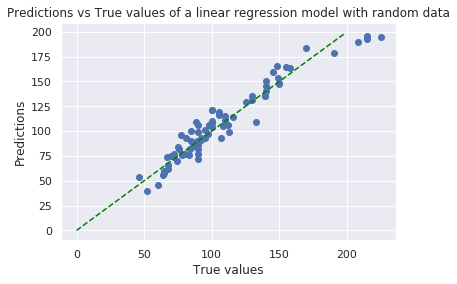

In [26]:
# Create linear regression model
lm = linear_model.LinearRegression()
# fit the model on the training data 
lm = lm.fit(data_random['x_train'], data_random['y_train'])

data_random['y_predict'] = lm.predict(data_random['x_test'])
# print out the first 10 predictions
print("First 10 predictions for the random test data:")
print(data_random['y_predict'][0:10])
print('\n')

# accuracy and mean squared error
print_scores(lm, data_random)

# diagram with predictions and true values
# plot the model 
plt.scatter(data_random['y_test'], data_random['y_predict'])
# descriptions
plt.title("Predictions vs True values of a linear regression model with random data")
plt.xlabel("True values")
plt.ylabel("Predictions")
# diagonal (where prediction = real value)
plt.plot(range(0,200), range(0,200), '--', color='green')

Es fällt auf, dass das Linear Regression Modell bereits ziemlich gut performt. Da es sich aber bei den benutzten Daten um zufällig ausgewählten Daten aus dem Dataframe handel, kann daraus noch keine stichhaltiges Schlussfolgerung gezogen werden. Dies liegt daran, dass die ausgewählten Daten zufällig genau die Daten sind, welche sehr gut mit einem Linear Regression Modell performen. Deswegen wird im nächsten Schritt die **KFold cross validation** angewendet, um einen Mittelwert mit verschieden aufgeteilten Trainings- und Testdatensätzen zu bilden, wodurch ein stichhaltigeres und vergleichbareres Ergebnis erzielen zu können.

### KFold cross validation

In [27]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


##### Wie KFold funktioniert

In [28]:
for train_index, test_index in kf.split(range(0,10)):
    print(train_index, test_index)

[1 2 3 4 5 6 7 8 9] [0]
[0 2 3 4 5 6 7 8 9] [1]
[0 1 3 4 5 6 7 8 9] [2]
[0 1 2 4 5 6 7 8 9] [3]
[0 1 2 3 5 6 7 8 9] [4]
[0 1 2 3 4 6 7 8 9] [5]
[0 1 2 3 4 5 7 8 9] [6]
[0 1 2 3 4 5 6 8 9] [7]
[0 1 2 3 4 5 6 7 9] [8]
[0 1 2 3 4 5 6 7 8] [9]


KFold splittet das gegebenen Datenset in n Datensatzbereiche auf, und benutzt dann anschließend immer einen der Datenbereiche als Testsdaten und die restlichen als Trainingsdaten.

##### Extended Variation

In [29]:
from sklearn.model_selection import StratifiedKFold
import statistics
from sklearn.preprocessing import StandardScaler

# folds = StratifiedKFold(n_splits=10)
# similar to kfold
# seperating all of your folds
# devide each of your classification categories in a uniform way

## arrays for storing information
# linear regression
acc_lr = [] # accuracy
mse_lr = [] # mean squared error
# decision tree
acc_dt = [] # accuracy
mse_dt = [] # mean squared error
# test and train data array
datas = []

# init standard scaler (shift data to a mean of zero, and spread of 1 standard deviation)
std = StandardScaler()
std.fit(x_t2)


for train_index, test_index in kf.split(x_t2):
    data = dict()
    data['x_train'], data['x_test'], data['y_train'], data['y_test'] = x_t2.iloc[train_index], x_t2.iloc[test_index], \
                                       y_t2.iloc[train_index], y_t2.iloc[test_index]

    datas.append(data.copy())
    
    # normalise data
    data['x_train'] = std.transform(data['x_train'])
    data['x_test'] = std.transform(data['x_test'])

    
    # create models
    lr_model = linear_model.LinearRegression()
    dt_model = DecisionTreeRegressor(random_state=1)
    
    # train models 
    lr_model = lr_model.fit(data['x_train'], data['y_train'])
    dt_model = dt_model.fit(data['x_train'], data['y_train'])
    
    # get accuracy
    acc_lr.append(get_accuracy(lr_model ,data))
    acc_dt.append(get_accuracy(dt_model, data))
    
    # get mean squared error 
    mse_lr.append(get_mse(data['y_test'], lr_model.predict(data['x_test'])))
    mse_dt.append(get_mse(data['y_test'], dt_model.predict(data['x_test'])))
    
# There is also a shorter variation:

## from sklearn.model_selection import cross_val_score
## cross_val_score(linear_model.LinearRegression(), x_t2, y_t2, cv=10)

### Results

In [30]:
print("\nLinear Regression")
print("Accuracy:")
print("Results: ", format_float_list(acc_lr))
print("Average: ", statistics.mean(acc_lr))
print("Mean squared error:")
print("Results:",format_float_list(mse_lr))
print("Average: ", statistics.mean(mse_lr))

print("\nDecision Tree")
print("Accuracy:")
print("Results:",format_float_list(acc_dt))
print("Average: ", statistics.mean(acc_dt))
print("Mean squared error:")
print("Results:",format_float_list(mse_dt))
print("Average: ", statistics.mean(mse_dt))


Linear Regression
Accuracy:
Results:  ['0.78', '0.93', '0.91', '0.87', '0.83', '0.93', '0.84', '0.90', '0.83', '0.35']
Average:  0.8149418243713921
Mean squared error:
Results: ['560.57', '128.40', '202.99', '151.79', '97.96', '92.16', '114.92', '73.41', '51.36', '149.57']
Average:  162.31394682212962

Decision Tree
Accuracy:
Results: ['0.77', '0.90', '0.87', '0.58', '0.75', '0.86', '0.74', '0.88', '0.58', '0.43']
Average:  0.7362327610990366
Mean squared error:
Results: ['590.52', '178.10', '296.72', '481.79', '137.92', '173.56', '184.28', '90.72', '124.23', '130.18']
Average:  238.80352564102563


Wie man aus dem oberen Erbenis sehen kann, erzielt das Linear Regression Modell auf denen gegebenen Datensätzen einen wesentlich bessere Präzision als das Decision Tree Modell. Die Präzision unterscheidet sich um knapp 8%. Auch der MSE ist beim Linear Regression Modell im Durchschnitt wesentlich besser. Anschließend wird der zweite Datensatz für beide Modelle nochmal bildlich dargestellt, da beide auf diesem Modell die höchste Präzision erreicht haben.

#### Visualisierung

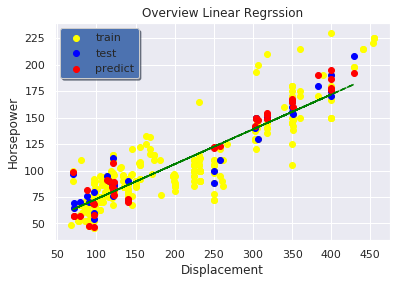

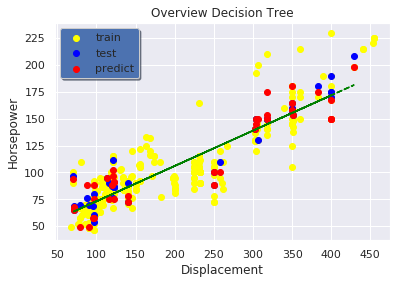

In [31]:
data_lr = datas[1].copy() # todo: choose dynamic the best
data_dt = datas[1].copy()


lr_model = linear_model.LinearRegression()
dt_model = DecisionTreeRegressor(random_state=1)


# train models 
lr_model = lr_model.fit(data_lr['x_train'], data_lr['y_train'])
dt_model = dt_model.fit(data_dt['x_train'], data_dt['y_train'])

# predict y
data_lr['y_predict'] = lr_model.predict(data_lr['x_test'])
data_dt['y_predict'] = dt_model.predict(data_dt['x_test'])


plot_overview_diagram('Overview Linear Regrssion', labels_t2, data_lr)
plot_overview_diagram('Overview Decision Tree', labels_t2, data_dt)

An den Diagrammen kann man erkennen, dass die beiden Modelle die Werte für die gegebenen Datensätze schon ziemlich gut voraussagen konnten (hohe Präzision). Allerdings fällt auf, dass das Decision Tree Modell ein paar mehr Ausreißer hat, was auf den höheren MSE zurückzuführen ist.

#### Vorhersage der PS eines Autos

In [32]:
from ipywidgets import widgets

# this shitty form cost me like 4 hours wtf

print("Predict Horsepower of a car: \n")

# ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
textboxes = dict()
default_values = {'mpg': '25.', 'cylinders': '4.' , 'displacement': '98.' , 'weight': '2046.', \
                   'acceleration': '19.', 'model year': '71.', 'origin': '1.'}


for attr in default_values.keys():
    textboxes[attr] = widgets.Text()
    print(attr)
    textboxes[attr].value = default_values[attr]
    display(textboxes[attr])



submit_button = widgets.Button(description="Predict Horsepower")
display(submit_button)

print("\nPredicted horspower")
output_tb = widgets.Text()
display(output_tb)

def handle_button_click(b):
    try:
        data = read_out_infos()
        output_tb.value = 'Linear Regression: {:.2f} \n Decision Tree: {:.2f}'\
        .format(predict_horsepower(data, lr_model)[0], predict_horsepower(data, dt_model)[0])
    except Exception as error:
        output_tb.value = str(error)
        
        
        
    
def read_out_infos():
    #input_car['mpg'] =
    data = [[]]
    for attr_name in textboxes.keys():
        value = textboxes[attr_name].value
        if is_float(value):
            data[0].append(float(value))
        else:
            raise Exception('Wrong datatype: Expected float got {} in textbox \"{}\"'.format(value, attr_name))
    return data


def is_float(value):
    try:
        float(value)
        return True
    except:
        return False
    
    
submit_button.on_click(handle_button_click)



Predict Horsepower of a car: 

mpg


Text(value='25.')

cylinders


Text(value='4.')

displacement


Text(value='98.')

weight


Text(value='2046.')

acceleration


Text(value='19.')

model year


Text(value='71.')

origin


Text(value='1.')

Button(description='Predict Horsepower', style=ButtonStyle())


Predicted horspower


Text(value='')

### Ergebnis

In [33]:
#todo: ergebnis nochmal erörtern

### Weitere Optimierungsmöglichkeiten

1. Datensätze normalisieren (Check)
2. Kategorische Daten in Variablen
3. Feature Engineering
    1. Sind meine Merkmale kollinear?
    2. Haben meine Features Abhängigkeiten?
4. Regulierung der Merkmale um ein Overfitting zu vermeiden



# Nummer 3: 

## Aufgabe
- zwei Klassifikationsverfahren
- um Fahrzeuge bei sonstigen Daten eine Zylinderzahl zuzuordnen

### Weiterhin zu beantworten
- Validieren und testen der Ergebnisse mit Evaluationsmethoden
- Ergebnis der Verfahren vergleichbar optisch darstellen
- Beschreibung des Endergebnisses
- Diskussion, welche Lösung sich entschieden wird
- Optimierung einer bis maximal drei Interationen
- Kommentar, welche weitern Möglichkeiten es gibt
- Methode
  - Manuelle Eingabe Werte
  - Vorhersage treffen 
  - Optische Darstellung
  
  

### Weitere Importe


In [34]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

### Funktionen

In [35]:
# classifies cylinders of car datasets
def classify_cylinders(cars, model):
    predictions = model.predict(cars)
    for i in range(0, len(cars)):
        print("Given=%s, Classified Cylinders: %s" % (cars[i], predictions[i]))
    return prediction

# get the accuracy of a model
def get_accuracy(predictions, real_values):
    errors = abs(predictions - real_values)
    mape = 100 * np.mean(errors / real_values)
    return 100 - mape

##### Split dataframe

In [36]:
# split dataframe into data and target
# this time is the aim the cylinders of the car
column_names_t3 = ['mpg', 'horsepower', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
x_t3 = pd.DataFrame(df_with_correction, columns=column_names_t3)
y_t3 = df_with_correction['cylinders']
labels_t3 = {'x':'displacement', 'y': 'cylinders'}


#### Training

In [37]:
from sklearn.ensemble import RandomForestClassifier

# feature scaling
scaler = preprocessing.StandardScaler()  
scaler.fit(x_t3)

# kfold
kf = KFold(n_splits=10)

datas = []

for train_index, test_index in kf.split(x_t3):
    data = dict()
    # create training and test data 
    data['x_train'], data['x_test'], data['y_train'], data['y_test'] = x_t3.iloc[train_index], x_t3.iloc[test_index], \
                                       y_t3.iloc[train_index], y_t3.iloc[test_index]
    datas.append(data.copy())
    
    # Gaussian Naive Bayes
    nb_model = MultinomialNB()
    nb_model.fit(data['x_train'], data['y_train'])
    nb_pred = nb_model.predict(data['x_test'])
    datas[-1]['nb_error'] = np.mean(nb_pred != data['y_test']) 
    
    # normalise data
    data['x_train'] = std.transform(data['x_train'])
    data['x_test'] = std.transform(data['x_test'])
    
    # knn
    # calculating error values for different k value
    errors = []
    k_max = 100
    k_min = 1
    for k in range(k_min, k_max):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(data['x_train'], data['y_train'])
        pred_i = knn_model.predict(data['x_test'])
        # append error
        errors.append(np.mean(pred_i != data['y_test']))
    # save the  error list to data
    datas[-1]['knn_errors'] = errors
    
    
    
    # random forest
    rf_model = RandomForestClassifier(n_estimators=100)
    rf_model.fit(data['x_train'], data['y_train'])
    rf_pred = rf_model.predict(data['x_test'])
    datas[-1]['rf_error'] = np.mean(rf_pred != data['y_test'])
    
# get the error lists of every model
knn_errror_average = []
knn_error_min = []
nb_error = []
rf_error = []

for data in datas:
    errors = data['knn_errors']
    knn_errror_average.append(statistics.mean(errors))
    knn_error_min.append(min(errors))
    nb_error.append(data['nb_error'])
    rf_error.append(data['rf_error'])

# print the mean error average and minimum of every model
print('Mean Error of every model')
print('kNN overall average:  \t{:.4f}\t Min: {:.4f}'.format(statistics.mean(knn_errror_average), min(knn_errror_average)))
print('kNN min average:      \t{:.4f}\t Min: {:.4f}'.format(statistics.mean(knn_error_min), min(knn_error_min)))
print('Naive Bayes Average:  \t{:.4f}\t Min: {:.4f}'.format(statistics.mean(nb_error), min(nb_error)))
print('Random Forest:        \t{:.4f}\t Min: {:.4f}'.format(statistics.mean(rf_error), min(rf_error)))

# print Accuracy
print('Accuracy of')


Mean Error of every model
kNN overall average:  	0.1405	 Min: 0.0655
kNN min average:      	0.0665	 Min: 0.0250
Naive Bayes Average:  	0.0665	 Min: 0.0000
Random Forest:        	0.0308	 Min: 0.0000
Accuracy of


## Zusammenfassung
Um die Modelle zu trainineren, wurde zunächst mittels _kFold cross validation_ die Daten in 10 Gruppen aufgeteilt. Anschließend wurde jeweils immer eine der Gruppen als Testdatensammlung eingesetzt, und die andern jeweils zum Trainieren der Netze benutzt. Als Modelle wurden folgende eingesetzt:   
- Gaussian Naive Bayes
- kNN - k-Nearest Neighbors
- Random Forest   
   
Für den Gaussian Naive Bayes wurden die Datensammlungen jeweils ohne weitere Standardisierungen benutzt. Für die restlichen  Modelle wurden die Daten zunächst standardisiert. Für den kNN ging es noch darum, jeweils das beste K für die akutellen Daten zu ermitteln. Dabei wurde für K jeweils Werte zwischen 1 und 100 eingesetzt, um herauszufinde, für welches K am wenigsten Klassifizierungsfehler auftreten. Beispielhaft sind die Ergebnisse für verschiedene K's nachfolgend mal dargestellt.

In [38]:
# calculating error values for different k value
# create random training and testing vars
data_random = dict()
data_random['x_train'], data_random['x_test'], data_random['y_train'], data_random['y_test'] = \
            train_test_split(x_t3, y_t3, test_size=0.2)
error = []
k_max = 100
k_min = 1
for i in range(k_min, k_max):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(data_knn['x_train'], data_knn['y_train'])
    pred_i = knn.predict(data_knn['x_test'])
    # append error 
    error.append(np.mean(pred_i != data_knn['y_test']))
    
# plot errors
plt.plot(range(k_min, k_max), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
# description
plt.title('Error Rate for different K Values')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

NameError: name 'data_knn' is not defined

Nachdem auch noch das Random Forest Modell mit den Daten trainiert wurde, wurde abschließend der Durchschnitt der Falschklassifizierungsquote der verschiedenen Modelle ermittelt, um entscheiden zu können, welches Modell am besten performt. Dabei wurde folgendes Ergebnis ermittelt:   

```
Mean Error of every model
kNN overall average:  	0.1405	 Min: 0.0655
kNN min average:      	0.0665	 Min: 0.0250
Naive Bayes Average:  	0.0665	 Min: 0.0000
Random Forest:        	0.0359	 Min: 0.0000
```

Selbst wenn man für das kNN-Modell immer den besten Wert nehmen würde, performt kNN im Durchschnitt nur genauso gut wie Naive Bayes. Dafür hat das Naive-Bayes auch noch ein Modell gehabt, welches auf den Datensätzen mit 0 Fehlentscheidungen alle Testdatensätze richtig klassifiziert hat. Das Random Forest Modell hat auch mindestens ein Modell gehabt, welches perfekt klassifiziert hat, und hat auch noch den besten Durschnitt aller Modelle erlangt. Deswegen bietet sich das Random Forest Verfahren am besten für die gegebene Datenmenge an.

### Visualisierung bei zufälliger Datenmenge

In [ ]:
# create random training and testing vars
data_random = dict()
data_random['x_train'], data_random['x_test'], data_random['y_train'], data_random['y_test'] = \
            train_test_split(x_t3, y_t3, test_size=0.2)

# Gaussian Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(data_random['x_train'], data_random['y_train'])
nb_pred = nb_model.predict(data_random['x_test'])

# random forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(data_random['x_train'], data_random['y_train'])
rf_pred = rf_model.predict(data_random['x_test'])

# output
print('Gaussian Naive Bayes')
print(classification_report(data_random['y_test'], nb_pred))
print('\nRandom Forest')
print(classification_report(data_random['y_test'], rf_pred))


##### Vergleich DIagramm

In [ ]:
different_cylinder = y_t3.unique()

# Gaussian Naive Bayes
mat = confusion_matrix(data_random['y_test'], nb_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=different_cylinder, yticklabels=different_cylinder)
plt.title('Gaussian Naive Bayes: Cylinder classification')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()

# Random Forest
mat = confusion_matrix(data_random['y_test'], rf_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=different_cylinder, yticklabels=different_cylinder)
plt.title('Random Forest: Cylinder classification')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.show()


#### Klassifizierung von Beispieldatensätzen

In [ ]:
from ipywidgets import widgets

# this shitty form cost me like 4 hours wtf

print("Classify Cylinder of a car: \n")

# ['mpg', 'horsepower', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
textboxes = dict()
default_values = {'mpg': '25.', 'horsepower': '100.' , 'displacement': '98.' , 'weight': '2046.', \
                   'acceleration': '19.', 'model year': '71.', 'origin': '1.'}


for attr in default_values.keys():
    textboxes[attr] = widgets.Text()
    print(attr)
    textboxes[attr].value = default_values[attr]
    display(textboxes[attr])



submit_button = widgets.Button(description="Classify cylinder")
display(submit_button)

print("\nClassified Cylinder")
output_tb = widgets.Text()
display(output_tb)

def handle_button_click(b):
    try:
        data = read_out_infos()
        output_tb.value = 'Gaussian Naive Bayes: {:.2f} \n Random Forest: {:.2f}'\
        .format(predict_horsepower(data, nb_model)[0], predict_horsepower(data, rf_model)[0])
    except Exception as error:
        output_tb.value = str(error)
        
        
        
    
def read_out_infos():
    #input_car['mpg'] =
    data = [[]]
    for attr_name in textboxes.keys():
        value = textboxes[attr_name].value
        if is_float(value):
            data[0].append(float(value))
        else:
            raise Exception('Wrong datatype: Expected float got {} in textbox \"{}\"'.format(value, attr_name))
    return data


def is_float(value):
    try:
        float(value)
        return True
    except:
        return False
    
    
submit_button.on_click(handle_button_click)
